## Handwritten Digit Recognition using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train),len(x_test)

(60000, 10000)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train.shape

(60000, 28, 28)

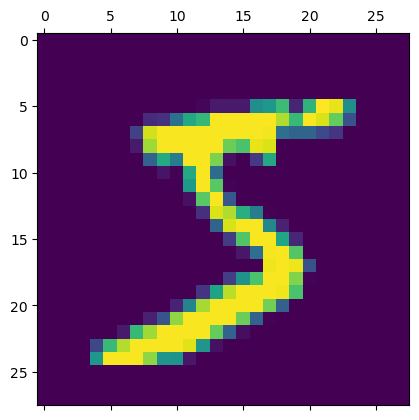

In [7]:
plt.matshow(x_train[0])

## Scale the data b/w 0 to 1

In [8]:
x_test = x_test / 255
x_train = x_train / 255

In [9]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [10]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [11]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Neural Network

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# tensorboard callback to store logs
tb_callback = keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.fit(x_train_flatten, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4663 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9261


## Launch Tensor Board

In [31]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Could not find '/C/Users/Nikhil
Vishwakarma/AppData/Roaming/Python/Python312/site-
packages/tensorboard/__pycache__/main.cpython-312.pyc' (set by the
`TENSORBOARD_BINARY` environment variable). Please ensure that your
PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

##### copy this command and run in terminal

```
python 'C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\tensorboard\main.py' --logdir logs/
```

In [40]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9270


[0.26841723918914795, 0.9269999861717224]

In [41]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.25719288e-02, 3.66476485e-07, 7.60423243e-02, 9.51848567e-01,
       2.72264984e-03, 1.97798178e-01, 1.47071285e-06, 9.99779701e-01,
       1.12068854e-01, 7.25573242e-01], dtype=float32)

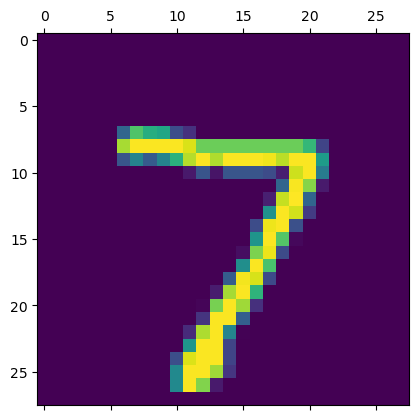

In [42]:
plt.matshow(x_test[0])

In [43]:
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## confusion matrix

In [45]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    4,    1,    0,    7,    6,    3,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    8,  942,    9,    6,    5,   11,    9,   35,    4],
       [   2,    0,   29,  902,    0,   37,    2,    8,   20,   10],
       [   1,    1,    9,    0,  897,    1,   11,    4,   10,   48],
       [   7,    2,    6,   19,    6,  804,   10,    3,   28,    7],
       [   9,    3,    9,    1,    7,   13,  911,    2,    3,    0],
       [   1,    5,   28,    5,    4,    2,    0,  942,    2,   39],
       [   5,    8,    8,   17,    9,   38,    9,    7,  866,    7],
       [   9,    7,    2,    9,   16,    9,    0,   14,    7,  936]])>

<Axes: >

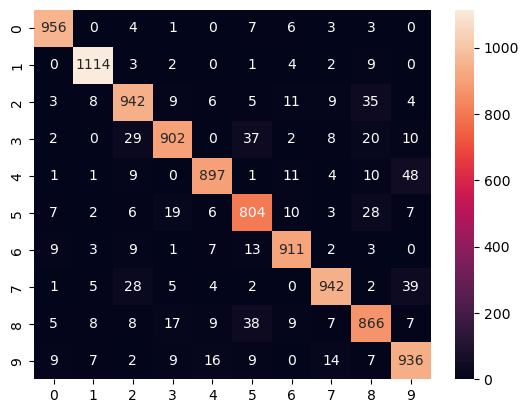

In [46]:
from seaborn import heatmap

plt.xlabel('Predicted')
plt.ylabel('Truth')
heatmap(cm,annot=True,fmt='d')